In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import pandas as pd
import seaborn as sns
from sklearn import preprocessing

large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")

# Import données

In [4]:
df_car = pd.read_csv(r'bmw.csv')
df_hos = pd.read_csv(r'hospital_mortality.csv')

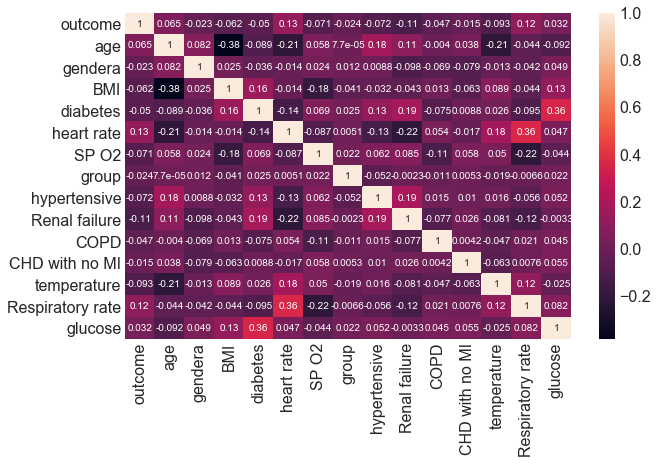

In [5]:
df_hos.drop(columns = ['ID'], inplace = True)
df_hos.dropna(subset = ['outcome'])

df_hos = df_hos[['outcome', 'age', 'gendera', 'BMI', 'diabetes', 'heart rate', 'SP O2', 'group', 'hypertensive', 'Renal failure', 'COPD', 'CHD with no MI', 'temperature', 'Respiratory rate', 'glucose' ]]

corrMatrix = df_hos.corr()

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
sns.heatmap(corrMatrix, annot = True)
plt.savefig("corrC.png")

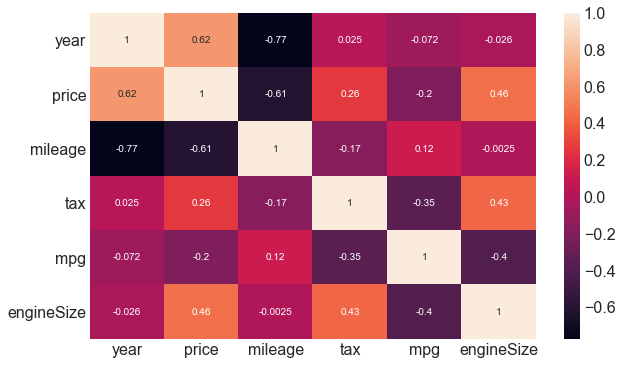

In [6]:
corrMatrix = df_car.corr()

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
sns.heatmap(corrMatrix, annot = True)
plt.savefig("corrR.png")

In [7]:
df_car = pd.get_dummies(df_car)
df_car.dropna(inplace = True)
df_car

,year,price,mileage,tax,mpg,engineSize,model_ 1 Series,model_ 2 Series,model_ 3 Series,model_ 4 Series,...,model_ i3,model_ i8,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,fuelType_Diesel,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,2014,11200,67068,125,57.6,2.0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
1,2018,27000,14827,145,42.8,2.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,2016,16000,62794,160,51.4,3.0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
3,2017,12750,26676,145,72.4,1.5,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0
4,2014,14500,39554,160,50.4,3.0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10776,2016,19000,40818,150,54.3,2.0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
10777,2016,14600,42947,125,60.1,2.0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
10778,2017,13100,25468,200,42.8,2.0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
10779,2014,9930,45000,30,64.2,2.0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0


In [8]:
df_hos = pd.get_dummies(df_hos)
df_hos.interpolate(inplace = True)
df_hos

,outcome,age,gendera,BMI,diabetes,heart rate,SP O2,group,hypertensive,Renal failure,COPD,CHD with no MI,temperature,Respiratory rate,glucose
0,0.0,72,1,37.588179,1,68.837838,98.394737,1,0,1,0,0,36.714286,16.621622,114.636364
1,0.0,75,2,32.080407,0,101.370370,96.923077,1,0,0,1,0,36.682540,20.851852,147.500000
2,0.0,83,2,26.572634,0,72.318182,95.291667,1,0,1,0,0,36.453704,23.640000,149.000000
3,0.0,43,2,83.264629,0,94.500000,93.846154,1,0,0,0,0,36.287037,21.857143,128.250000
4,0.0,75,2,31.824842,0,67.920000,99.280000,1,1,1,1,0,36.761905,21.360000,145.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1172,0.0,62,1,25.516870,1,100.125000,94.130435,2,1,1,0,0,37.055556,24.500000,120.000000
1173,0.0,78,1,25.822710,1,114.640000,93.526316,2,0,1,0,0,35.972222,18.958333,138.333333
1174,0.0,85,2,23.891779,1,52.720000,98.800000,2,1,1,0,0,36.777778,18.680000,99.000000
1175,0.0,79,2,35.288554,1,93.400000,99.560000,2,0,1,0,1,36.422222,22.040000,135.166667


# Tree

In [9]:
hos_y = df_hos[['outcome']]
hos_X = df_hos.drop(axis = 1, columns = ['outcome'])

car_y = df_car[['price']]
car_X = df_car.drop(axis=1, columns =['price'])

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

## Classifier

In [10]:
tree_deep = list(j for j in range(2, 35))

tr_score = list()
tr_Merror = list()
tr_merror = list()

te_score = list()
te_Merror = list()
te_merror = list()


mean_time = list()
Mtime = list()
mtime = list()

for i in tree_deep:
    clas = DecisionTreeClassifier(max_depth = i, random_state = 0)
    scores = cross_validate(clas, hos_X, hos_y, cv=5, scoring = ('accuracy'), return_train_score =True)
    tr_score.append(1-sum(scores['train_score'])/5)
    tr_Merror.append(1-min(scores['train_score']))
    tr_merror.append(1-max(scores['train_score']))
    
    te_score.append(1-sum(scores['test_score'])/5)
    te_Merror.append(1-min(scores['test_score']))
    te_merror.append(1-max(scores['test_score']))
    
    mean_time.append(sum(scores['fit_time'])/5)
    Mtime.append(max(scores['fit_time']))
    mtime.append(min(scores['fit_time']))

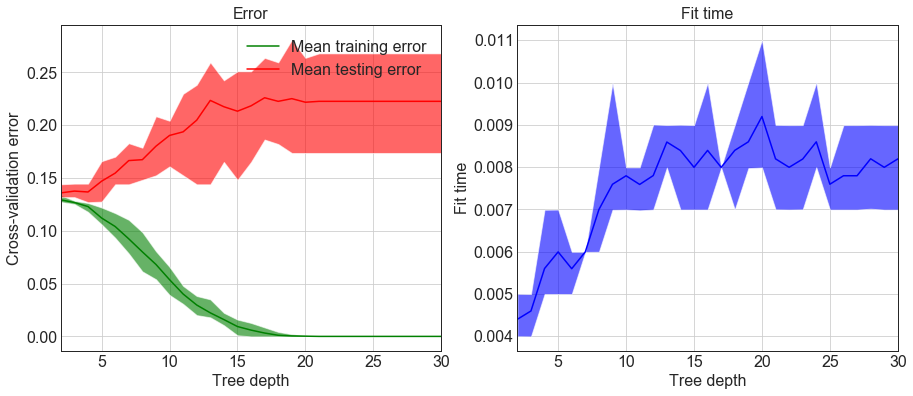

In [11]:
f, axs = plt.subplots(1,2,figsize=(15,6))

plt.subplot(121)
plt.title('Error')

plt.plot(tree_deep, tr_score, label="Mean training error", color = "green")
plt.fill_between(tree_deep, tr_Merror, tr_merror, facecolor='green', interpolate=True, alpha=0.6)
plt.plot(tree_deep, te_score, label="Mean testing error", color = "red")
plt.fill_between(tree_deep, te_Merror, te_merror, facecolor='red', interpolate=True, alpha=0.6)

plt.grid()
plt.xlim(2, 30)


plt.xlabel('Tree depth')
plt.ylabel('Cross-validation error')

plt.legend()

plt.subplot(122)
plt.title('Fit time')

plt.plot(tree_deep, mean_time, color = "blue")
plt.fill_between(tree_deep, Mtime, mtime, facecolor='blue', interpolate=True, alpha=0.6)

plt.grid()
plt.xlim(2, 30)

plt.xlabel('Tree depth')
plt.ylabel('Fit time')

plt.savefig('DTC1.png')

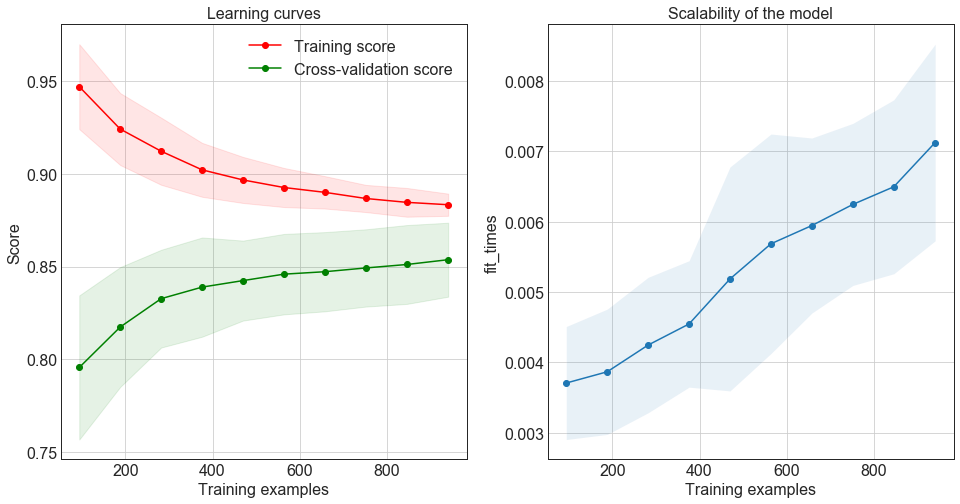

In [12]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
f, axes = plt.subplots(1, 2, figsize = (16, 8))

reg = DecisionTreeClassifier(ccp_alpha= 0.0, criterion= 'gini', max_depth= 5, max_features= None, max_leaf_nodes= None, min_impurity_decrease= 0.0, min_impurity_split= None,min_samples_leaf= 2, min_samples_split= 2, min_weight_fraction_leaf= 0.0, presort= 'deprecated', random_state= None, splitter= 'best')
titre = "Learning curves"
cv = ShuffleSplit(n_splits = 100, test_size = 0.2, random_state = 40)
train_sizes = np.linspace(.1, 1, 10)

axes[0].set_title(titre)
axes[0].set_xlabel("Training examples")
axes[0].set_ylabel("Score")

train_sizes, train_scores, test_scores, fit_times, _ = \
    learning_curve(reg, hos_X, hos_y, cv=cv, n_jobs=4,
    train_sizes=train_sizes, return_times=True)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
fit_times_mean = np.mean(fit_times, axis=1)
fit_times_std = np.std(fit_times, axis=1)

# Plot learning curve
axes[0].grid()
axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
axes[1].grid()
axes[1].plot(train_sizes, fit_times_mean, 'o-')
axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
axes[1].set_xlabel("Training examples")
axes[1].set_ylabel("fit_times")
axes[1].set_title("Scalability of the model")

plt.savefig("DTC2.png")

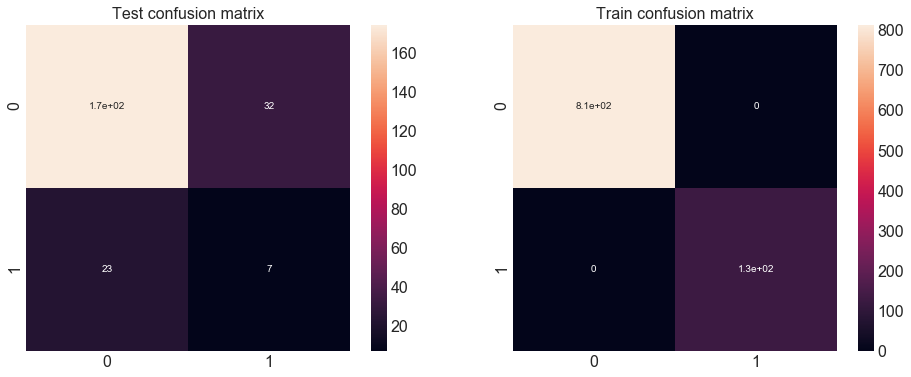

In [13]:
from sklearn.metrics import confusion_matrix

hosX_train, hosX_test, hosy_train, hosy_test = train_test_split(hos_X, hos_y, test_size = 0.2, random_state = 40)

clas = DecisionTreeClassifier(random_state = 40)
clas.fit(hosX_train, hosy_train)
yte_pred = clas.predict(hosX_test)
ytr_pred = clas.predict(hosX_train)
print()

f, axs = plt.subplots(1,2,figsize=(16,6))

plt.subplot(121)
plt.title('Test confusion matrix')
matrix = confusion_matrix(hosy_test, yte_pred)
sns.heatmap(matrix, annot = True)

plt.subplot(122)
plt.title('Train confusion matrix')
matrix = confusion_matrix(hosy_train, ytr_pred)
sns.heatmap(matrix, annot = True)

plt.savefig("confu1.png")

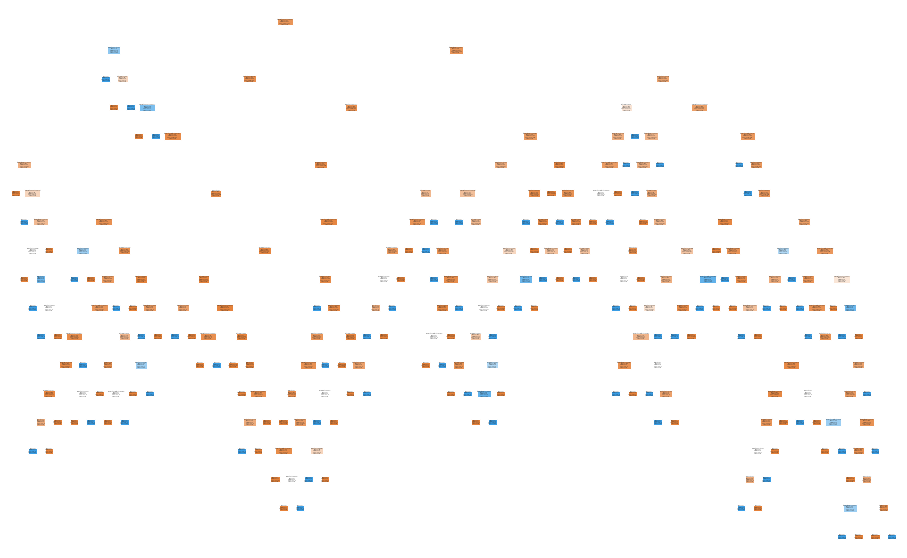

In [14]:
from sklearn import tree
features = df_hos.columns
classes = ['Died', 'Lived']

tree.plot_tree(clas, feature_names = features, class_names = classes, filled=True)
plt.savefig('Tree1.png')

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 5, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': None, 'splitter': 'best'}


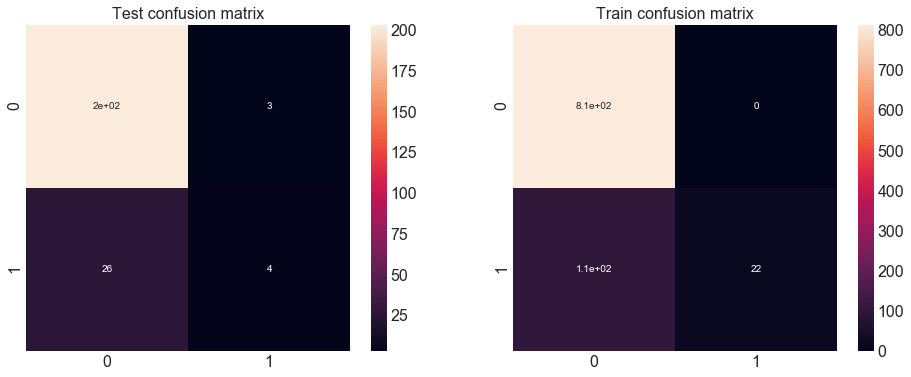

In [15]:
from sklearn.model_selection import GridSearchCV

para = {'max_depth': [5,10,12,15, 17, 20, 25],
         'min_samples_split': [2,3,4,5],
         'min_samples_leaf': [1,2,3]}

clas = DecisionTreeClassifier()
gscv = GridSearchCV(estimator = clas, param_grid = para)
gscv.fit(hosX_train, hosy_train)

best_pre = gscv.best_estimator_
best_pre.fit(hosX_train, hosy_train)
print(best_pre.get_params())
ytr_pred = best_pre.predict(hosX_train)
yte_pred = best_pre.predict(hosX_test)

f, axs = plt.subplots(1,2,figsize=(16,6))

plt.subplot(121)
plt.title('Test confusion matrix')
matrix = confusion_matrix(hosy_test, yte_pred)
sns.heatmap(matrix, annot = True)

plt.subplot(122)
plt.title('Train confusion matrix')
matrix = confusion_matrix(hosy_train, ytr_pred)
sns.heatmap(matrix, annot = True)

plt.savefig("confu2.png")

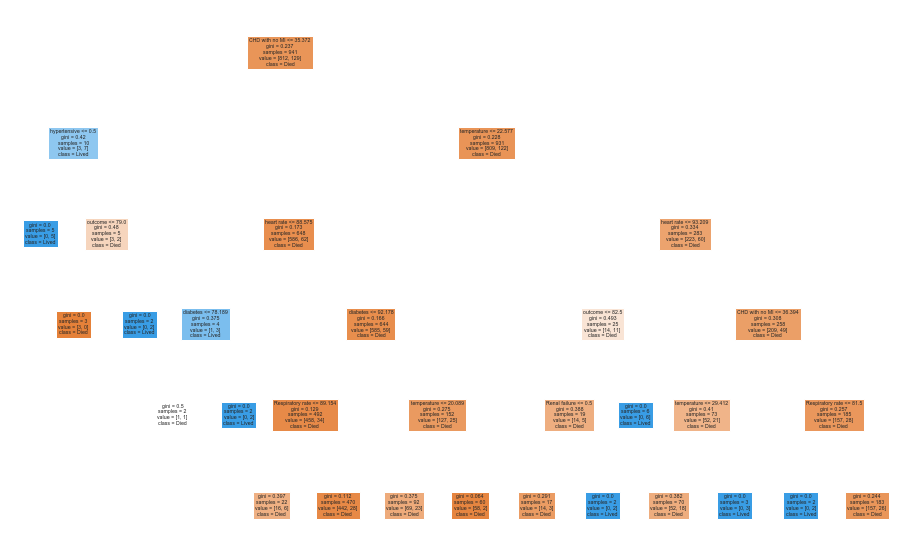

In [16]:
tree.plot_tree(best_pre, feature_names = features, class_names = classes, filled=True)
plt.savefig('Tree2.png')

## Regressor

In [17]:
tree_deep = list(j for j in range(2, 35))

tr_score = list()
tr_Merror = list()
tr_merror = list()

te_score = list()
te_Merror = list()
te_merror = list()


mean_time = list()
Mtime = list()
mtime = list()

for i in tree_deep:
    reg = DecisionTreeRegressor(max_depth = i, random_state = 0)
    scores = cross_validate(reg, car_X, car_y, cv=5, scoring = ('r2'), return_train_score =True)
    tr_score.append(1-sum(scores['train_score'])/5)
    tr_Merror.append(1-min(scores['train_score']))
    tr_merror.append(1-max(scores['train_score']))
    
    te_score.append(1-sum(scores['test_score'])/5)
    te_Merror.append(1-min(scores['test_score']))
    te_merror.append(1-max(scores['test_score']))
    
    mean_time.append(sum(scores['fit_time'])/5)
    Mtime.append(max(scores['fit_time']))
    mtime.append(min(scores['fit_time']))

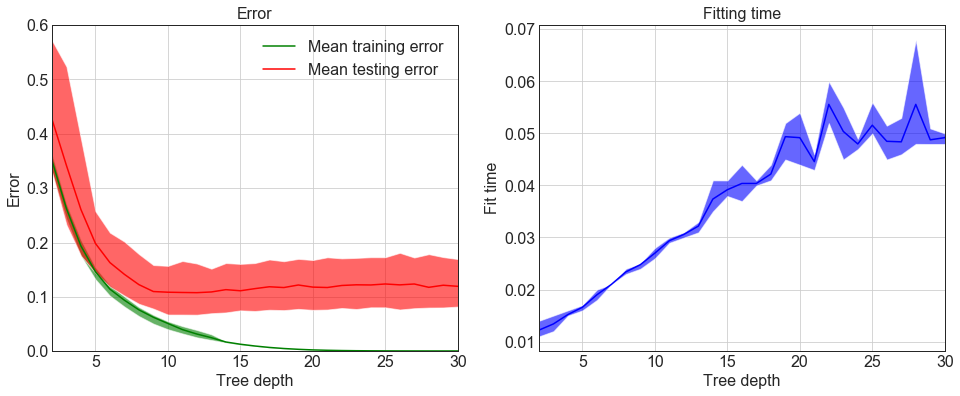

In [18]:
f, axs = plt.subplots(1,2,figsize=(16,6))

plt.subplot(121)
plt.title('Error')

plt.plot(tree_deep, tr_score, label="Mean training error", color = "green")
plt.fill_between(tree_deep, tr_Merror, tr_merror, facecolor='green', interpolate=True, alpha=0.6)
plt.plot(tree_deep, te_score, label="Mean testing error", color = "red")
plt.fill_between(tree_deep, te_Merror, te_merror, facecolor='red', interpolate=True, alpha=0.6)

plt.grid()
plt.xlim(2, 30)
plt.ylim(0, 0.6)

plt.xlabel('Tree depth')
plt.ylabel('Error')

plt.legend()

plt.subplot(122)
plt.title('Fitting time')

plt.plot(tree_deep, mean_time, color = "blue")
plt.fill_between(tree_deep, Mtime, mtime, facecolor='blue', interpolate=True, alpha=0.6)

plt.grid()
plt.xlim(2, 30)

plt.xlabel('Tree depth')
plt.ylabel('Fit time')

plt.savefig('DTR1.png')

In [19]:
carX_train, carX_test, cary_train, cary_test = train_test_split(car_X, car_y, test_size = 0.2, random_state = 40)

para = {'max_depth': [5,10,12,15, 20],
         'min_samples_split': [2,3,4,5],
         'min_samples_leaf': [1,2,3]}

clas = DecisionTreeRegressor()
gscv = GridSearchCV(estimator = clas, param_grid = para)
gscv.fit(carX_train, cary_train)

best_pre = gscv.best_estimator_
best_pre.fit(hosX_train, hosy_train)
print(best_pre.get_params())

{'ccp_alpha': 0.0, 'criterion': 'mse', 'max_depth': 15, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 3, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': None, 'splitter': 'best'}


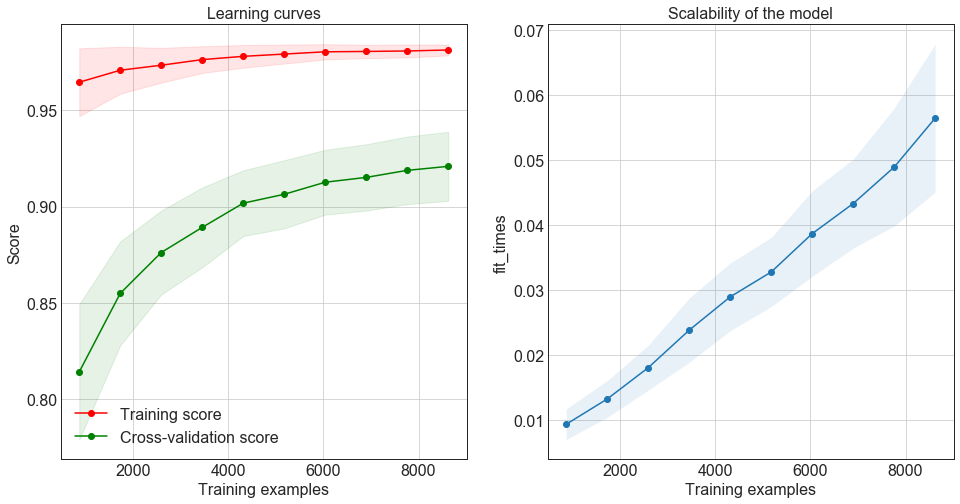

In [20]:
f, axes = plt.subplots(1, 2, figsize = (16, 8))

reg = DecisionTreeRegressor(ccp_alpha = 0, criterion = 'mse', max_depth = 20, min_impurity_decrease = 0, min_samples_leaf = 2,
                           min_samples_split = 5, min_weight_fraction_leaf = 0, presort = 'precated', splitter = 'best')
titre = "Learning curves"
cv = ShuffleSplit(n_splits = 100, test_size = 0.2, random_state = 40)
train_sizes = np.linspace(.1, 1, 10)

axes[0].set_title(titre)
axes[0].set_xlabel("Training examples")
axes[0].set_ylabel("Score")

train_sizes, train_scores, test_scores, fit_times, _ = \
    learning_curve(reg, car_X, car_y, cv=cv, n_jobs=4,
    train_sizes=train_sizes, return_times=True)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
fit_times_mean = np.mean(fit_times, axis=1)
fit_times_std = np.std(fit_times, axis=1)

# Plot learning curve
axes[0].grid()
axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
axes[1].grid()
axes[1].plot(train_sizes, fit_times_mean, 'o-')
axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
axes[1].set_xlabel("Training examples")
axes[1].set_ylabel("fit_times")
axes[1].set_title("Scalability of the model")


plt.savefig("DTR2.png")

# k-NN

## Classifier

In [19]:
from sklearn.neighbors import KNeighborsClassifier

nb_neig = list(j for j in range(1, 35))

tr_score = list()
tr_Merror = list()
tr_merror = list()

te_score = list()
te_Merror = list()
te_merror = list()


mean_time = list()
Mtime = list()
mtime = list()

for i in nb_neig:
    neigh = KNeighborsClassifier(n_neighbors = i)
    scores = cross_validate(neigh, hos_X, np.ravel(hos_y), cv=5, scoring = ('accuracy'), return_train_score =True)
    tr_score.append(1-sum(scores['train_score'])/5)
    tr_Merror.append(1-min(scores['train_score']))
    tr_merror.append(1-max(scores['train_score']))
    
    te_score.append(1-sum(scores['test_score'])/5)
    te_Merror.append(1-min(scores['test_score']))
    te_merror.append(1-max(scores['test_score']))
    
    mean_time.append(sum(scores['fit_time'])/5)
    Mtime.append(max(scores['fit_time']))
    mtime.append(min(scores['fit_time']))

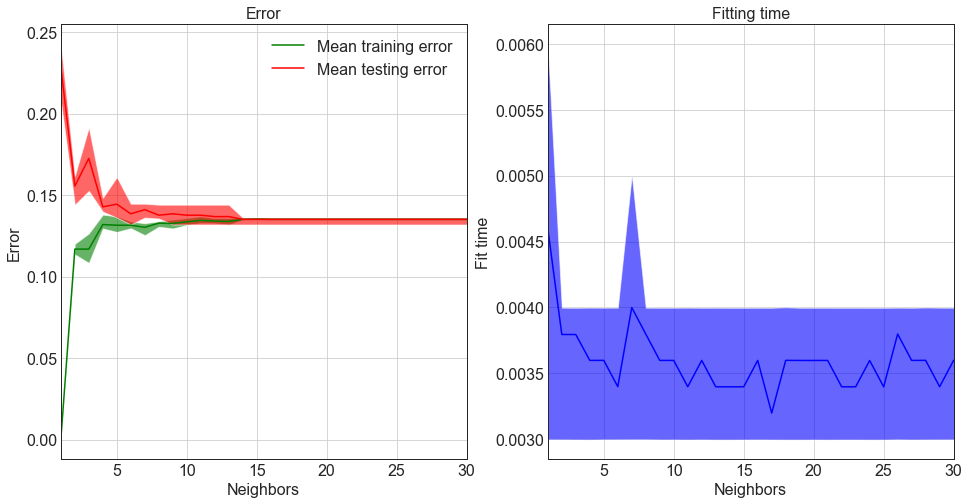

In [20]:
f, axs = plt.subplots(1,2,figsize=(16, 8))

plt.subplot(121)
plt.title('Error')

plt.plot(nb_neig, tr_score, label="Mean training error", color = "green")
plt.fill_between(nb_neig, tr_Merror, tr_merror, facecolor='green', interpolate=True, alpha=0.6)
plt.plot(nb_neig, te_score, label="Mean testing error", color = "red")
plt.fill_between(nb_neig, te_Merror, te_merror, facecolor='red', interpolate=True, alpha=0.6)

plt.grid()
plt.xlim(1, 30)

plt.xlabel('Neighbors')
plt.ylabel('Error')

plt.legend()

plt.subplot(122)
plt.title('Fitting time')

plt.plot(nb_neig, mean_time, color = "blue")
plt.fill_between(nb_neig, Mtime, mtime, facecolor='blue', interpolate=True, alpha=0.6)

plt.grid()
plt.xlim(1,30)

plt.xlabel('Neighbors')
plt.ylabel('Fit time')

plt.savefig('KNC1.png')

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 12, 'p': 1, 'weights': 'uniform'}


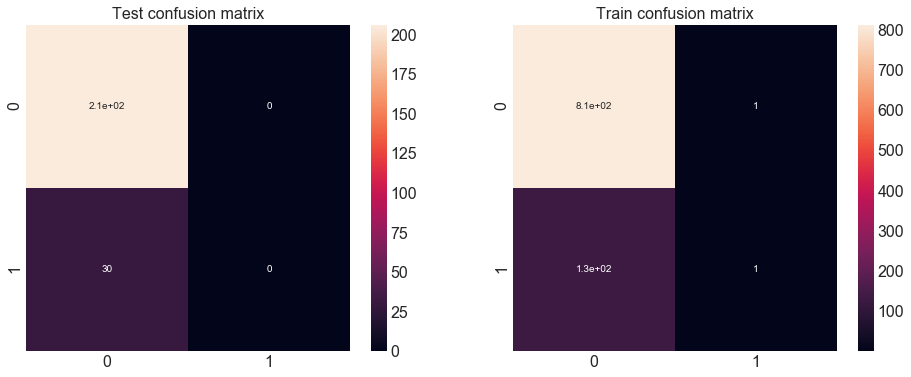

In [21]:
para = {'n_neighbors': range(1, 20),
         'weights': ['uniform', 'distance'],
         'p': [1,2]}

clas = KNeighborsClassifier()
gscv = GridSearchCV(estimator = clas, param_grid = para)
gscv.fit(hosX_train, np.ravel(hosy_train))

best_pre = gscv.best_estimator_
best_pre.fit(hosX_train, np.ravel(hosy_train))
print(best_pre.get_params())

ytr_pred = best_pre.predict(hosX_train)
yte_pred = best_pre.predict(hosX_test)

f, axs = plt.subplots(1,2,figsize=(16,6))

plt.subplot(121)
plt.title('Test confusion matrix')
matrix = confusion_matrix(hosy_test, yte_pred)
sns.heatmap(matrix, annot = True)

plt.subplot(122)
plt.title('Train confusion matrix')
matrix = confusion_matrix(hosy_train, ytr_pred)
sns.heatmap(matrix, annot = True)

plt.savefig("confuknn.png")

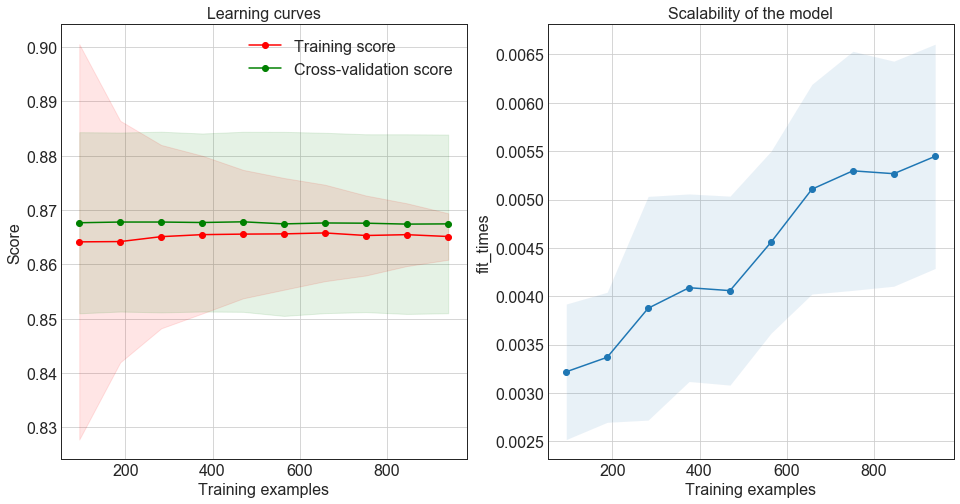

In [22]:
f, axes = plt.subplots(1, 2, figsize = (16, 8))

reg = KNeighborsClassifier(algorithm= 'auto', leaf_size= 30, metric= 'minkowski', metric_params= None,
                           n_jobs= None, n_neighbors= 12, p= 1, weights= 'uniform')
titre = "Learning curves"
cv = ShuffleSplit(n_splits = 100, test_size = 0.2, random_state = 40)
train_sizes = np.linspace(.1, 1, 10)

axes[0].set_title(titre)
axes[0].set_xlabel("Training examples")
axes[0].set_ylabel("Score")

train_sizes, train_scores, test_scores, fit_times, _ = \
    learning_curve(reg, hos_X, hos_y, cv=cv, n_jobs=4,
    train_sizes=train_sizes, return_times=True)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
fit_times_mean = np.mean(fit_times, axis=1)
fit_times_std = np.std(fit_times, axis=1)

# Plot learning curve
axes[0].grid()
axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
axes[1].grid()
axes[1].plot(train_sizes, fit_times_mean, 'o-')
axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
axes[1].set_xlabel("Training examples")
axes[1].set_ylabel("fit_times")
axes[1].set_title("Scalability of the model")

plt.savefig("KNC2.png")

## Regression

In [23]:
from sklearn.neighbors import KNeighborsRegressor

nb_neig = list(j for j in range(1, 35))

tr_score = list()
tr_Merror = list()
tr_merror = list()

te_score = list()
te_Merror = list()
te_merror = list()


mean_time = list()
Mtime = list()
mtime = list()

for i in nb_neig:
    neigh = KNeighborsRegressor(n_neighbors = i)
    scores = cross_validate(neigh, car_X, car_y, cv=5, scoring = ('r2'), return_train_score =True)
    tr_score.append(1-sum(scores['train_score'])/5)
    tr_Merror.append(1-min(scores['train_score']))
    tr_merror.append(1-max(scores['train_score']))
    
    te_score.append(1-sum(scores['test_score'])/5)
    te_Merror.append(1-min(scores['test_score']))
    te_merror.append(1-max(scores['test_score']))
    
    mean_time.append(sum(scores['fit_time'])/5)
    Mtime.append(max(scores['fit_time']))
    mtime.append(min(scores['fit_time']))

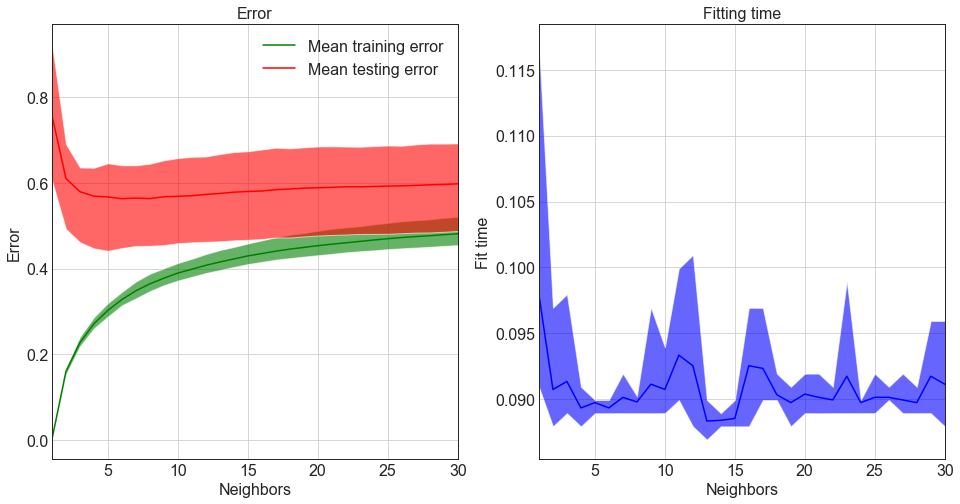

In [24]:
f, axs = plt.subplots(1,2,figsize=(16, 8))

plt.subplot(121)
plt.title('Error')

plt.plot(nb_neig, tr_score, label="Mean training error", color = "green")
plt.fill_between(nb_neig, tr_Merror, tr_merror, facecolor='green', interpolate=True, alpha=0.6)
plt.plot(nb_neig, te_score, label="Mean testing error", color = "red")
plt.fill_between(nb_neig, te_Merror, te_merror, facecolor='red', interpolate=True, alpha=0.6)

plt.grid()
plt.xlim(1, 30)

plt.xlabel('Neighbors')
plt.ylabel('Error')

plt.legend()

plt.subplot(122)
plt.title('Fitting time')

plt.plot(nb_neig, mean_time, color = "blue")
plt.fill_between(nb_neig, Mtime, mtime, facecolor='blue', interpolate=True, alpha=0.6)

plt.grid()
plt.xlim(1, 30)

plt.xlabel('Neighbors')
plt.ylabel('Fit time')

plt.savefig('KNR1.png')

In [25]:
para = {'n_neighbors': range(1, 20),
         'weights': ['uniform', 'distance'],
         'p': [1,2]}

clas = KNeighborsRegressor()
gscv = GridSearchCV(estimator = clas, param_grid = para)
gscv.fit(hosX_train, np.ravel(hosy_train))

best_pre = gscv.best_estimator_
best_pre.fit(car_X, np.ravel(car_y))
print(best_pre.get_params())

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 15, 'p': 1, 'weights': 'uniform'}


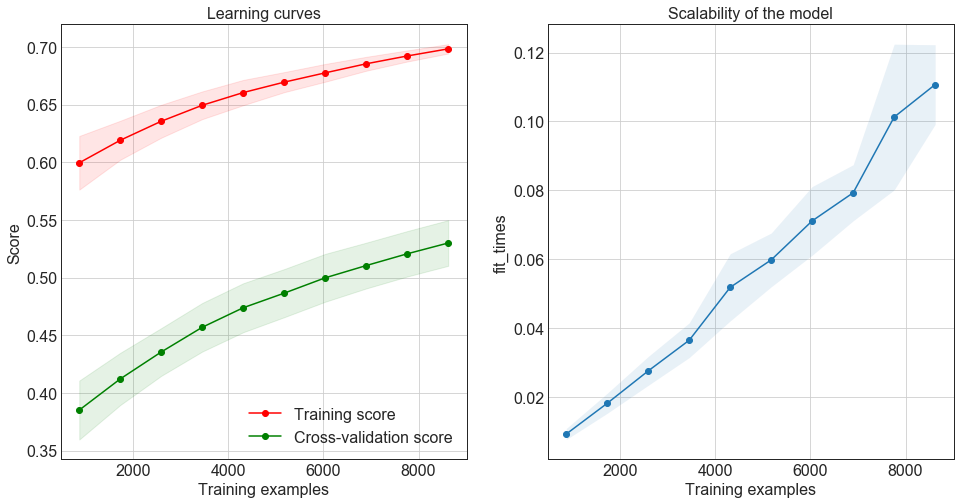

In [26]:
f, axes = plt.subplots(1, 2, figsize = (16, 8))

reg = KNeighborsRegressor()
titre = "Learning curves"
cv = ShuffleSplit(n_splits = 100, test_size = 0.2, random_state = 40)
train_sizes = np.linspace(.1, 1, 10)

axes[0].set_title(titre)
axes[0].set_xlabel("Training examples")
axes[0].set_ylabel("Score")

train_sizes, train_scores, test_scores, fit_times, _ = \
    learning_curve(reg, car_X, car_y, cv=cv, n_jobs=4,
    train_sizes=train_sizes, return_times=True)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
fit_times_mean = np.mean(fit_times, axis=1)
fit_times_std = np.std(fit_times, axis=1)

# Plot learning curve
axes[0].grid()
axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
axes[1].grid()
axes[1].plot(train_sizes, fit_times_mean, 'o-')
axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
axes[1].set_xlabel("Training examples")
axes[1].set_ylabel("fit_times")
axes[1].set_title("Scalability of the model")

plt.savefig("KNR2.png")

# Neural Networks

## Classifier

In [27]:
from mpl_toolkits import mplot3d
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [28]:
from sklearn.neural_network import MLPClassifier
import time

x = list()
y = list()
z = list()
t = list()

tr_score = list()
tr_Merror = list()
tr_merror = list()

te_score = list()
te_Merror = list()
te_merror = list()


mean_time = list()
Mtime = list()
mtime = list()


for maxi in [150, 200, 250, 300, 500, 750, 1000]:
    nn = MLPClassifier(activation = 'identity', max_iter = maxi)
    pip = make_pipeline(StandardScaler(), nn)
    t1 = time.time()
    pip.fit(hosX_train, np.ravel(hosy_train))
    fittime = time.time()-t1
    tesco = pip.score(hosX_test, np.ravel(hosy_test))
    x.append(maxi)
    y.append(tesco)
    t.append(fittime)
    
    scores = cross_validate(pip, hos_X, np.ravel(hos_y), cv=5, scoring = ('accuracy'), return_train_score =True)
    
    tr_score.append(1-sum(scores['train_score'])/5)
    tr_Merror.append(1-min(scores['train_score']))
    tr_merror.append(1-max(scores['train_score']))
    
    te_score.append(1-sum(scores['test_score'])/5)
    te_Merror.append(1-min(scores['test_score']))
    te_merror.append(1-max(scores['test_score']))
    
    mean_time.append(sum(scores['fit_time'])/5)
    Mtime.append(max(scores['fit_time']))
    mtime.append(min(scores['fit_time']))

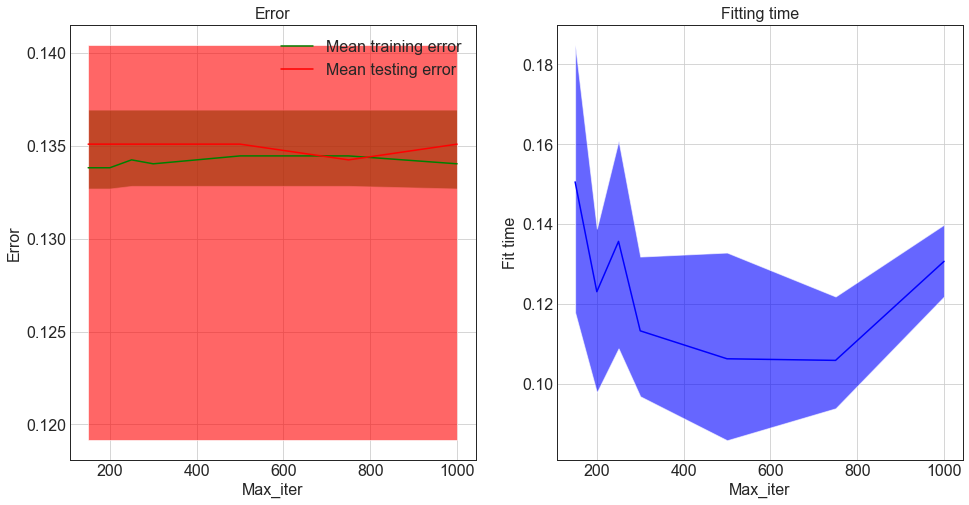

In [29]:
f, axes = plt.subplots(1, 2, figsize = (16, 8))

plt.subplot(121)
plt.title('Error')

plt.plot(x, tr_score, label="Mean training error", color = "green")
plt.fill_between(x, tr_Merror, tr_merror, facecolor='green', interpolate=True, alpha=0.6)
plt.plot(x, te_score, label="Mean testing error", color = "red")
plt.fill_between(x, te_Merror, te_merror, facecolor='red', interpolate=True, alpha=0.6)

plt.grid()


plt.xlabel('Max_iter')
plt.ylabel('Error')

plt.legend()

plt.subplot(122)
plt.title('Fitting time')

plt.plot(x, mean_time, color = "blue")
plt.fill_between(x, Mtime, mtime, facecolor='blue', interpolate=True, alpha=0.6)

plt.grid()


plt.xlabel('Max_iter')
plt.ylabel('Fit time')
plt.savefig('NNC1.png')

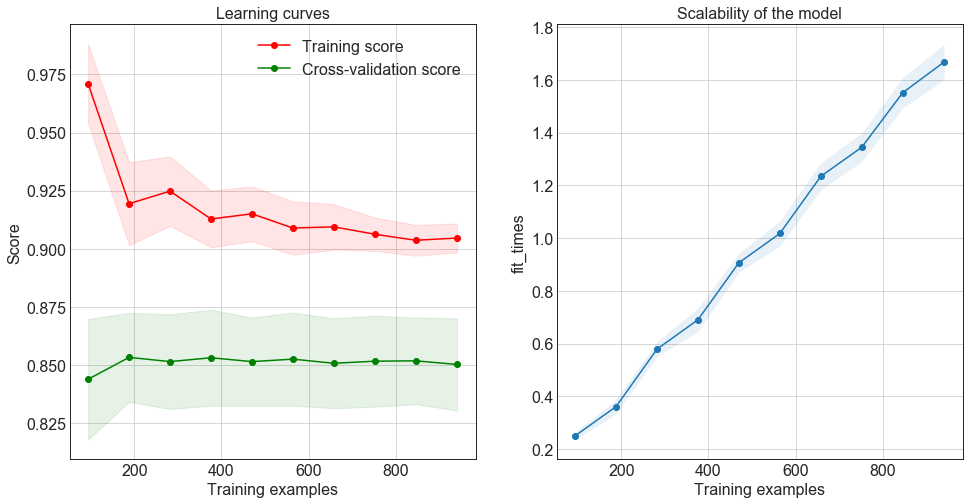

In [30]:
f, axes = plt.subplots(1, 2, figsize = (16, 8))

nn = MLPClassifier()
pip = make_pipeline(StandardScaler(), nn)
titre = "Learning curves"
cv = ShuffleSplit(n_splits = 100, test_size = 0.2, random_state = 40)
train_sizes = np.linspace(.1, 1, 10)

axes[0].set_title(titre)
axes[0].set_xlabel("Training examples")
axes[0].set_ylabel("Score")

train_sizes, train_scores, test_scores, fit_times, _ = \
    learning_curve(pip, hos_X, np.ravel(hos_y), cv=cv, n_jobs=4,
    train_sizes=train_sizes, return_times=True)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
fit_times_mean = np.mean(fit_times, axis=1)
fit_times_std = np.std(fit_times, axis=1)

# Plot learning curve
axes[0].grid()
axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
axes[1].grid()
axes[1].plot(train_sizes, fit_times_mean, 'o-')
axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
axes[1].set_xlabel("Training examples")
axes[1].set_ylabel("fit_times")
axes[1].set_title("Scalability of the model")

plt.savefig('NNC2.png')

## Regressor

In [31]:
from sklearn.neural_network import MLPRegressor

x = list()

tr_score = list()
tr_Merror = list()
tr_merror = list()

te_score = list()
te_Merror = list()
te_merror = list()


mean_time = list()
Mtime = list()
mtime = list()


for maxi in [500, 750, 1000, 1500]:
    nn = MLPRegressor(activation = 'identity', max_iter = maxi)
    pip = make_pipeline(StandardScaler(), nn)
    pip.fit(hosX_train, np.ravel(hosy_train))
    x.append(maxi)
    
    scores = cross_validate(pip, car_X, np.ravel(car_y), cv=5, scoring = ('r2'), return_train_score =True)
    
    tr_score.append(1-sum(scores['train_score'])/5)
    tr_Merror.append(1-min(scores['train_score']))
    tr_merror.append(1-max(scores['train_score']))
    
    te_score.append(1-sum(scores['test_score'])/5)
    te_Merror.append(1-min(scores['test_score']))
    te_merror.append(1-max(scores['test_score']))
    
    mean_time.append(sum(scores['fit_time'])/5)
    Mtime.append(max(scores['fit_time']))
    mtime.append(min(scores['fit_time']))

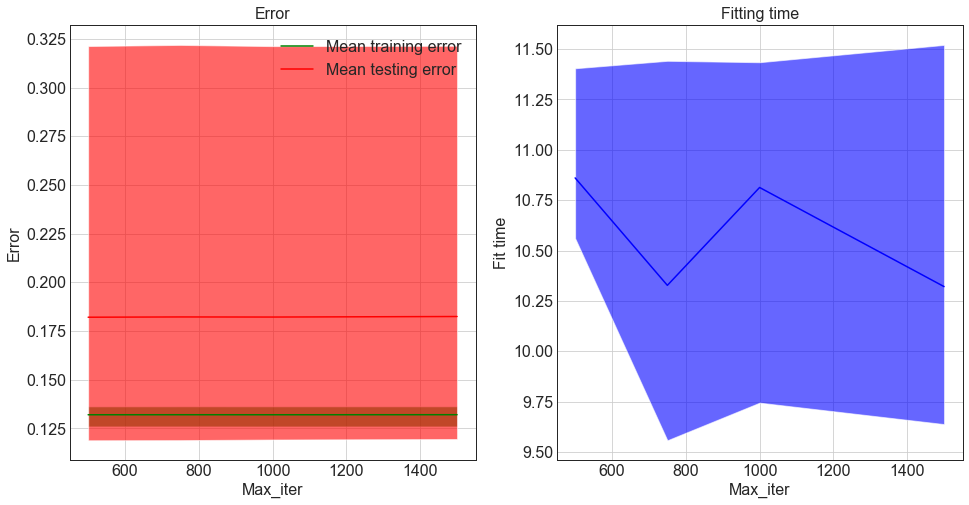

In [32]:
f, axes = plt.subplots(1, 2, figsize = (16, 8))

plt.subplot(121)
plt.title('Error')

plt.plot(x, tr_score, label="Mean training error", color = "green")
plt.fill_between(x, tr_Merror, tr_merror, facecolor='green', interpolate=True, alpha=0.6)
plt.plot(x, te_score, label="Mean testing error", color = "red")
plt.fill_between(x, te_Merror, te_merror, facecolor='red', interpolate=True, alpha=0.6)

plt.grid()


plt.xlabel('Max_iter')
plt.ylabel('Error')

plt.legend()

plt.subplot(122)
plt.title('Fitting time')

plt.plot(x, mean_time, color = "blue")
plt.fill_between(x, Mtime, mtime, facecolor='blue', interpolate=True, alpha=0.6)

plt.grid()


plt.xlabel('Max_iter')
plt.ylabel('Fit time')
plt.savefig('NNR1.png')

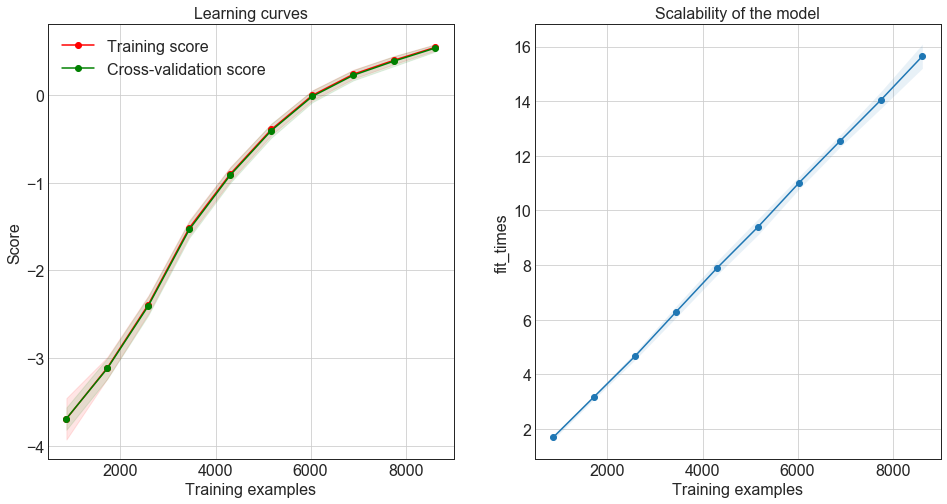

In [33]:
f, axes = plt.subplots(1, 2, figsize = (16, 8))

nn = MLPRegressor()
pip = make_pipeline(StandardScaler(), nn)
titre = "Learning curves"
cv = ShuffleSplit(n_splits = 100, test_size = 0.2, random_state = 40)
train_sizes = np.linspace(.1, 1, 10)

axes[0].set_title(titre)
axes[0].set_xlabel("Training examples")
axes[0].set_ylabel("Score")

train_sizes, train_scores, test_scores, fit_times, _ = \
    learning_curve(pip, car_X, np.ravel(car_y), cv=cv, n_jobs=4,
    train_sizes=train_sizes, return_times=True)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
fit_times_mean = np.mean(fit_times, axis=1)
fit_times_std = np.std(fit_times, axis=1)

# Plot learning curve
axes[0].grid()
axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
axes[1].grid()
axes[1].plot(train_sizes, fit_times_mean, 'o-')
axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
axes[1].set_xlabel("Training examples")
axes[1].set_ylabel("fit_times")
axes[1].set_title("Scalability of the model")

plt.savefig('NNR2.png')

# SVM

## Classifier

{'C': 0.1, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 5, 'gamma': 'scale', 'kernel': 'poly', 'max_iter': 15000, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


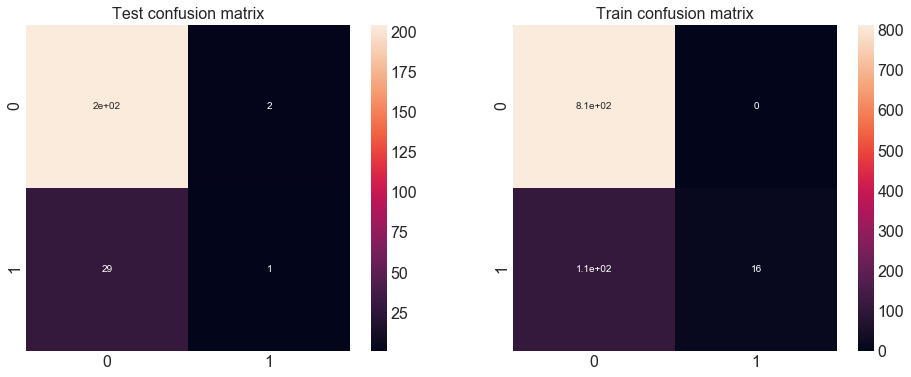

In [22]:
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

para = {'C' : [0.1, 0.5, 1, 2, 5],
        'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
       'degree' : [3, 4, 5]}

scaler = StandardScaler()
scaler.fit(hosX_train)
hosX_trainbis = scaler.transform(hosX_train)
hosX_testbis = scaler.transform(hosX_test)

clas = SVC(max_iter = 15000)
gscv = GridSearchCV(estimator = clas, param_grid = para)
gscv.fit(hosX_trainbis, np.ravel(hosy_train))

best_pre = gscv.best_estimator_
best_pre.fit(hosX_trainbis, np.ravel(hosy_train))
print(best_pre.get_params())

ytr_pred = best_pre.predict(hosX_trainbis)
yte_pred = best_pre.predict(hosX_testbis)

f, axs = plt.subplots(1,2,figsize=(16,6))

plt.subplot(121)
plt.title('Test confusion matrix')
matrix = confusion_matrix(hosy_test, yte_pred)
sns.heatmap(matrix, annot = True)

plt.subplot(122)
plt.title('Train confusion matrix')
matrix = confusion_matrix(hosy_train, ytr_pred)
sns.heatmap(matrix, annot = True)

plt.savefig("confusvc")

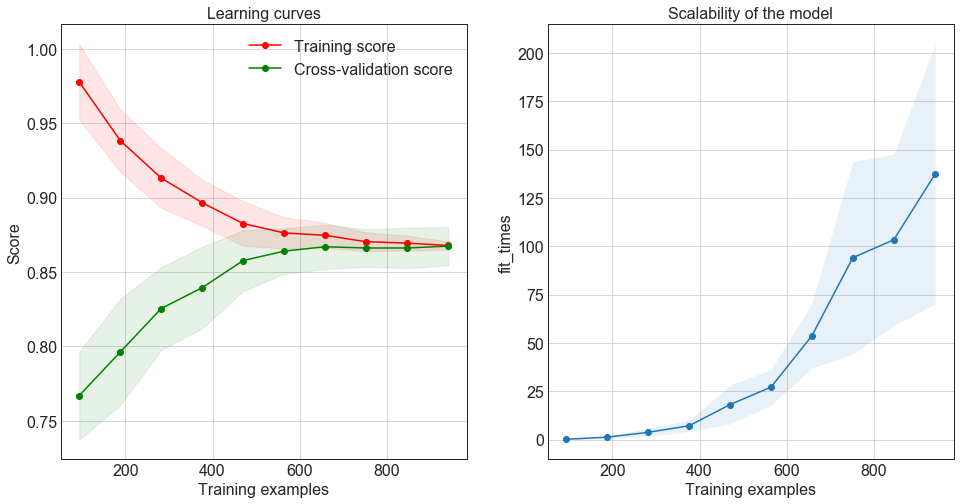

In [34]:
from sklearn.svm import SVC

f, axes = plt.subplots(1, 2, figsize = (16, 8))

reg = SVC(gamma = 0.001, kernel = 'poly')
titre = "Learning curves"
cv = ShuffleSplit(n_splits = 10, test_size = 0.2, random_state = 40)
train_sizes = np.linspace(.1, 1, 10)

axes[0].set_title(titre)
axes[0].set_xlabel("Training examples")
axes[0].set_ylabel("Score")

train_sizes, train_scores, test_scores, fit_times, _ = \
    learning_curve(reg, hos_X, hos_y, cv=cv, n_jobs=4,
    train_sizes=train_sizes, return_times=True)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
fit_times_mean = np.mean(fit_times, axis=1)
fit_times_std = np.std(fit_times, axis=1)

# Plot learning curve
axes[0].grid()
axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
axes[1].grid()
axes[1].plot(train_sizes, fit_times_mean, 'o-')
axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
axes[1].set_xlabel("Training examples")
axes[1].set_ylabel("fit_times")
axes[1].set_title("Scalability of the model")

plt.savefig("svcpoly2.png")

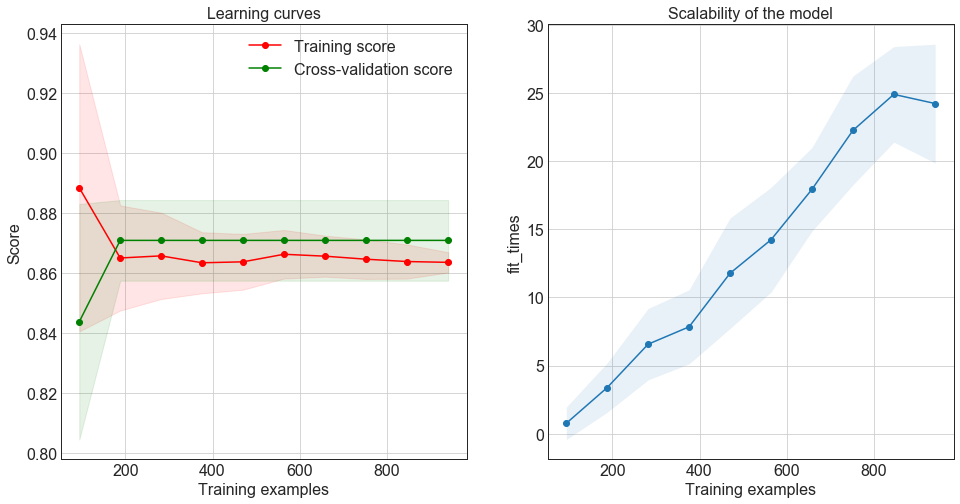

In [35]:
f, axes = plt.subplots(1, 2, figsize = (16, 8))

reg = SVC(gamma = 0.001, kernel = 'linear')
titre = "Learning curves"
cv = ShuffleSplit(n_splits = 10, test_size = 0.2, random_state = 40)
train_sizes = np.linspace(.1, 1, 10)

axes[0].set_title(titre)
axes[0].set_xlabel("Training examples")
axes[0].set_ylabel("Score")

train_sizes, train_scores, test_scores, fit_times, _ = \
    learning_curve(reg, hos_X, hos_y, cv=cv, n_jobs=4,
    train_sizes=train_sizes, return_times=True)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
fit_times_mean = np.mean(fit_times, axis=1)
fit_times_std = np.std(fit_times, axis=1)

# Plot learning curve
axes[0].grid()
axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
axes[1].grid()
axes[1].plot(train_sizes, fit_times_mean, 'o-')
axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
axes[1].set_xlabel("Training examples")
axes[1].set_ylabel("fit_times")
axes[1].set_title("Scalability of the model")

plt.savefig("svclinear2.png")

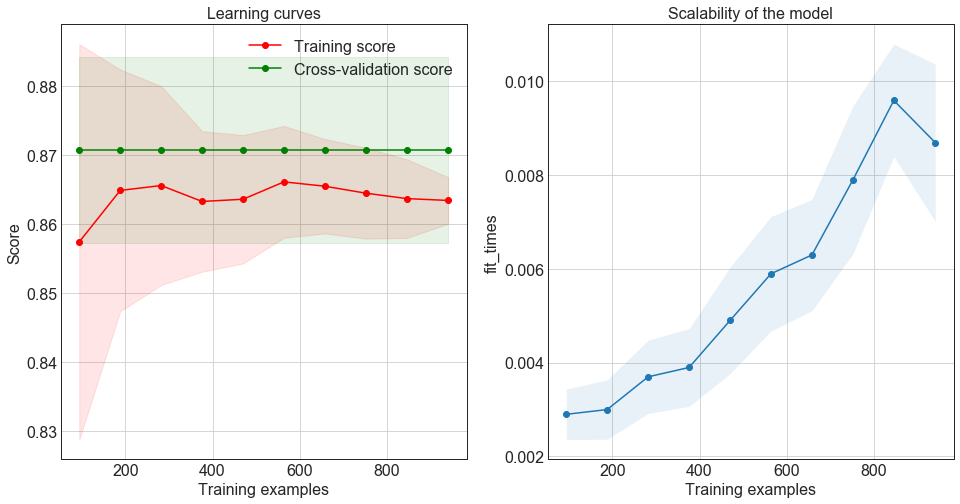

In [36]:
f, axes = plt.subplots(1, 2, figsize = (16, 8))

reg = SVC(gamma = 0.001, kernel = 'sigmoid')
titre = "Learning curves"
cv = ShuffleSplit(n_splits = 10, test_size = 0.2, random_state = 40)
train_sizes = np.linspace(.1, 1, 10)

axes[0].set_title(titre)
axes[0].set_xlabel("Training examples")
axes[0].set_ylabel("Score")

train_sizes, train_scores, test_scores, fit_times, _ = \
    learning_curve(reg, hos_X, hos_y, cv=cv, n_jobs=4,
    train_sizes=train_sizes, return_times=True)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
fit_times_mean = np.mean(fit_times, axis=1)
fit_times_std = np.std(fit_times, axis=1)

# Plot learning curve
axes[0].grid()
axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
axes[1].grid()
axes[1].plot(train_sizes, fit_times_mean, 'o-')
axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
axes[1].set_xlabel("Training examples")
axes[1].set_ylabel("fit_times")
axes[1].set_title("Scalability of the model")

plt.savefig("svcsig2.png")

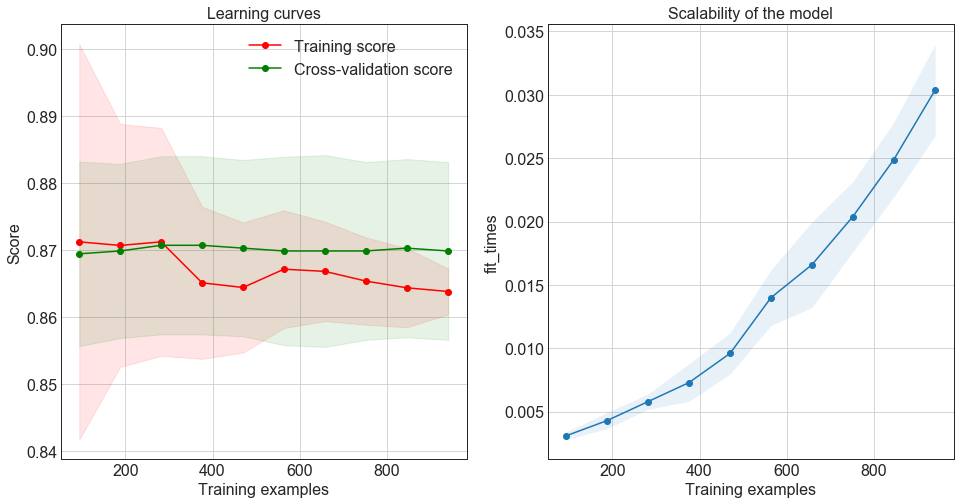

In [37]:
f, axes = plt.subplots(1, 2, figsize = (16, 8))

reg = SVC(gamma = 0.001, kernel = 'rbf')
titre = "Learning curves"
cv = ShuffleSplit(n_splits = 10, test_size = 0.2, random_state = 40)
train_sizes = np.linspace(.1, 1, 10)

axes[0].set_title(titre)
axes[0].set_xlabel("Training examples")
axes[0].set_ylabel("Score")

train_sizes, train_scores, test_scores, fit_times, _ = \
    learning_curve(reg, hos_X, hos_y, cv=cv, n_jobs=4,
    train_sizes=train_sizes, return_times=True)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
fit_times_mean = np.mean(fit_times, axis=1)
fit_times_std = np.std(fit_times, axis=1)

# Plot learning curve
axes[0].grid()
axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
axes[1].grid()
axes[1].plot(train_sizes, fit_times_mean, 'o-')
axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
axes[1].set_xlabel("Training examples")
axes[1].set_ylabel("fit_times")
axes[1].set_title("Scalability of the model")

plt.savefig("svcrbf2.png")

## Regressor

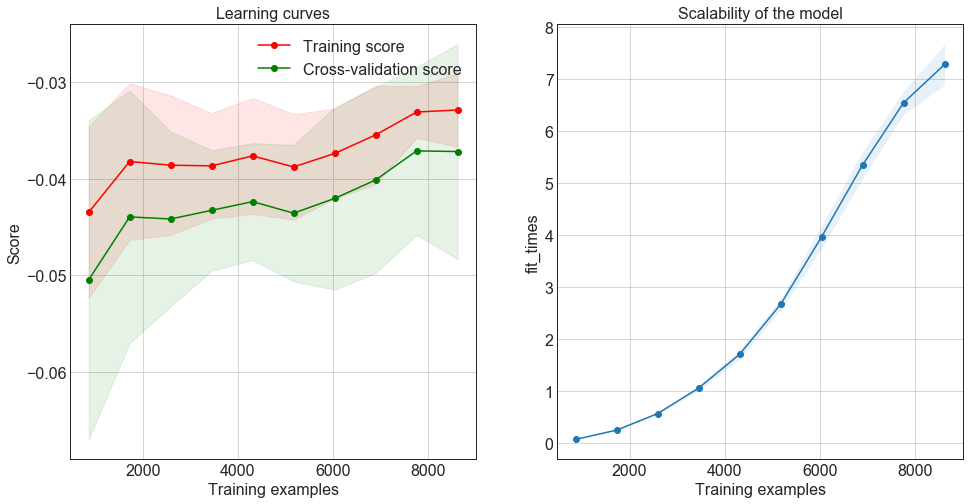

In [26]:
from sklearn.svm import SVR

scaler = StandardScaler()
scaler.fit(car_X)
car_Xb = scaler.transform(car_X)

f, axes = plt.subplots(1, 2, figsize = (16, 8))

reg = SVR(C = 2,gamma = 0.001, kernel = 'rbf')
titre = "Learning curves"
cv = ShuffleSplit(n_splits = 10, test_size = 0.2, random_state = 40)
train_sizes = np.linspace(.1, 1, 10)

axes[0].set_title(titre)
axes[0].set_xlabel("Training examples")
axes[0].set_ylabel("Score")

train_sizes, train_scores, test_scores, fit_times, _ = \
    learning_curve(reg, car_Xb, car_y, cv=cv, n_jobs=4,
    train_sizes=train_sizes, return_times=True)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
fit_times_mean = np.mean(fit_times, axis=1)
fit_times_std = np.std(fit_times, axis=1)

# Plot learning curve
axes[0].grid()
axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
axes[1].grid()
axes[1].plot(train_sizes, fit_times_mean, 'o-')
axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
axes[1].set_xlabel("Training examples")
axes[1].set_ylabel("fit_times")
axes[1].set_title("Scalability of the model")

plt.savefig("svrrbf2.png")

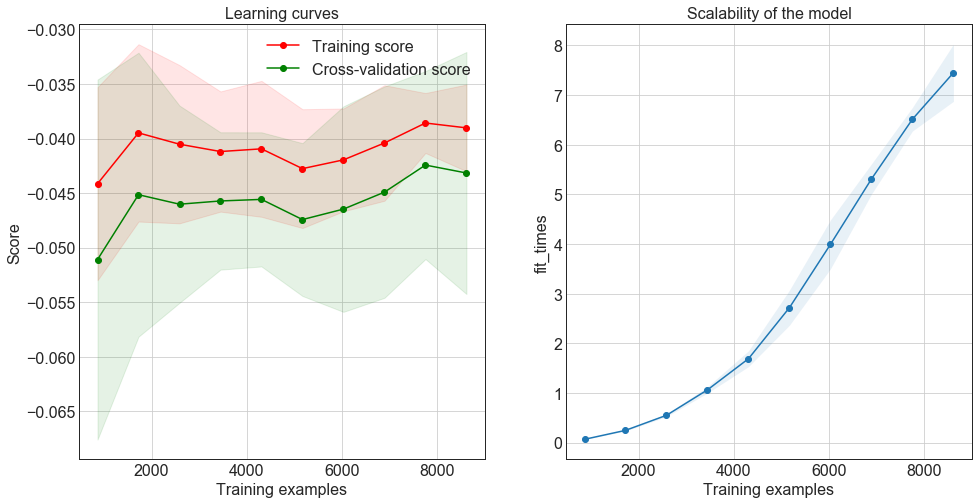

In [27]:
from sklearn.svm import SVR

f, axes = plt.subplots(1, 2, figsize = (16, 8))

reg = SVR(gamma = 0.001, kernel = 'sigmoid')
titre = "Learning curves"
cv = ShuffleSplit(n_splits = 10, test_size = 0.2, random_state = 40)
train_sizes = np.linspace(.1, 1, 10)

axes[0].set_title(titre)
axes[0].set_xlabel("Training examples")
axes[0].set_ylabel("Score")

train_sizes, train_scores, test_scores, fit_times, _ = \
    learning_curve(reg, car_Xb, car_y, cv=cv, n_jobs=4,
    train_sizes=train_sizes, return_times=True)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
fit_times_mean = np.mean(fit_times, axis=1)
fit_times_std = np.std(fit_times, axis=1)

# Plot learning curve
axes[0].grid()
axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
axes[1].grid()
axes[1].plot(train_sizes, fit_times_mean, 'o-')
axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
axes[1].set_xlabel("Training examples")
axes[1].set_ylabel("fit_times")
axes[1].set_title("Scalability of the model")

plt.savefig("svrsig2.png")

# Boosting

## Classification

{'algorithm': 'SAMME.R', 'base_estimator__ccp_alpha': 0.0, 'base_estimator__class_weight': None, 'base_estimator__criterion': 'gini', 'base_estimator__max_depth': None, 'base_estimator__max_features': None, 'base_estimator__max_leaf_nodes': None, 'base_estimator__min_impurity_decrease': 0.0, 'base_estimator__min_impurity_split': None, 'base_estimator__min_samples_leaf': 1, 'base_estimator__min_samples_split': 2, 'base_estimator__min_weight_fraction_leaf': 0.0, 'base_estimator__presort': 'deprecated', 'base_estimator__random_state': None, 'base_estimator__splitter': 'best', 'base_estimator': DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_stat

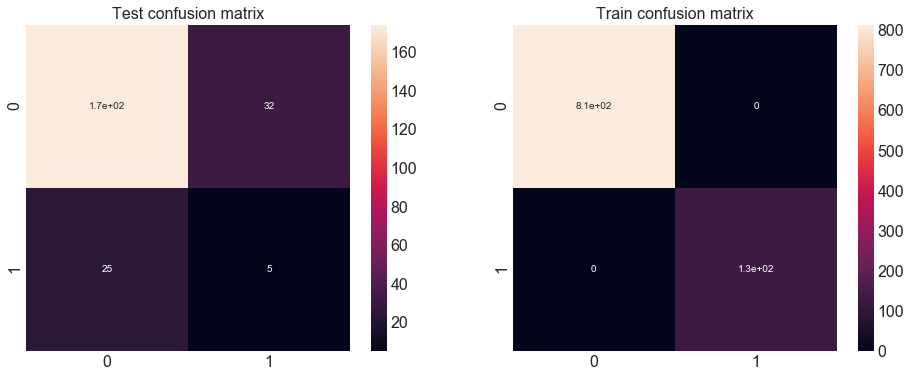

In [64]:
from sklearn.ensemble import AdaBoostClassifier

para = {'n_estimators':(25, 50, 75, 100),
       'learning_rate':(0.1, 0.5, 1, 2, 3)}

clas = AdaBoostClassifier(base_estimator = DecisionTreeClassifier())
gscv = GridSearchCV(estimator = clas, param_grid = para)
gscv.fit(hosX_train, np.ravel(hosy_train))

best_pre = gscv.best_estimator_
best_pre.fit(hosX_train, np.ravel(hosy_train))
print(best_pre.get_params())
ytr_pred = best_pre.predict(hosX_train)
yte_pred = best_pre.predict(hosX_test)

f, axs = plt.subplots(1,2,figsize=(16,6))

plt.subplot(121)
plt.title('Test confusion matrix')
matrix = confusion_matrix(hosy_test, yte_pred)
sns.heatmap(matrix, annot = True)

plt.subplot(122)
plt.title('Train confusion matrix')
matrix = confusion_matrix(hosy_train, ytr_pred)
sns.heatmap(matrix, annot = True)

plt.savefig("confuada.png")

In [ ]:
f, axes = plt.subplots(1, 2, figsize = (16, 8))

reg = AdaBoostClassifier(algorithm= 'SAMME.R',learning_rate= 0.5, n_estimators= 25)
titre = "Learning curves"
cv = ShuffleSplit(n_splits = 10, test_size = 0.2, random_state = 40)
train_sizes = np.linspace(.1, 1, 10)

axes[0].set_title(titre)
axes[0].set_xlabel("Training examples")
axes[0].set_ylabel("Score")

train_sizes, train_scores, test_scores, fit_times, _ = \
    learning_curve(reg, hos_X, hos_y, cv=cv, n_jobs=4,
    train_sizes=train_sizes, return_times=True)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
fit_times_mean = np.mean(fit_times, axis=1)
fit_times_std = np.std(fit_times, axis=1)

# Plot learning curve
axes[0].grid()
axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
axes[1].grid()
axes[1].plot(train_sizes, fit_times_mean, 'o-')
axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
axes[1].set_xlabel("Training examples")
axes[1].set_ylabel("fit_times")
axes[1].set_title("Scalability of the model")

plt.savefig("adacla2.png")

## Regression

In [65]:
from sklearn.ensemble import AdaBoostRegressor

para = {'n_estimators':(25, 50, 75, 100),
       'learning_rate':(0.1, 0.5, 1, 2, 3),
       'loss': ('linear', 'square', 'exponential')}

clas = AdaBoostRegressor()
gscv = GridSearchCV(estimator = clas, param_grid = para)
gscv.fit(carX_train, np.ravel(cary_train))

best_pre = gscv.best_estimator_
best_pre.fit(carX_train, np.ravel(cary_train))
print(best_pre.get_params())

{'base_estimator': None, 'learning_rate': 0.5, 'loss': 'exponential', 'n_estimators': 25, 'random_state': None}


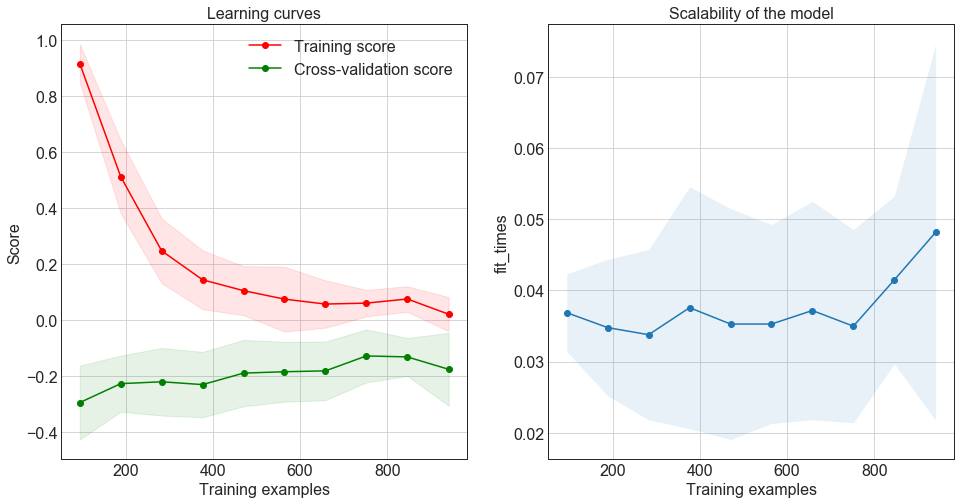

In [70]:
f, axes = plt.subplots(1, 2, figsize = (16, 8))

reg = AdaBoostRegressor(loss = 'linear',learning_rate= 1, n_estimators= 25)
titre = "Learning curves"
cv = ShuffleSplit(n_splits = 10, test_size = 0.2, random_state = 40)
train_sizes = np.linspace(.1, 1, 10)

axes[0].set_title(titre)
axes[0].set_xlabel("Training examples")
axes[0].set_ylabel("Score")

train_sizes, train_scores, test_scores, fit_times, _ = \
    learning_curve(reg, hos_X, hos_y, cv=cv, n_jobs=4,
    train_sizes=train_sizes, return_times=True)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
fit_times_mean = np.mean(fit_times, axis=1)
fit_times_std = np.std(fit_times, axis=1)

# Plot learning curve
axes[0].grid()
axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
axes[1].grid()
axes[1].plot(train_sizes, fit_times_mean, 'o-')
axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
axes[1].set_xlabel("Training examples")
axes[1].set_ylabel("fit_times")
axes[1].set_title("Scalability of the model")

plt.savefig("adareg2.png")

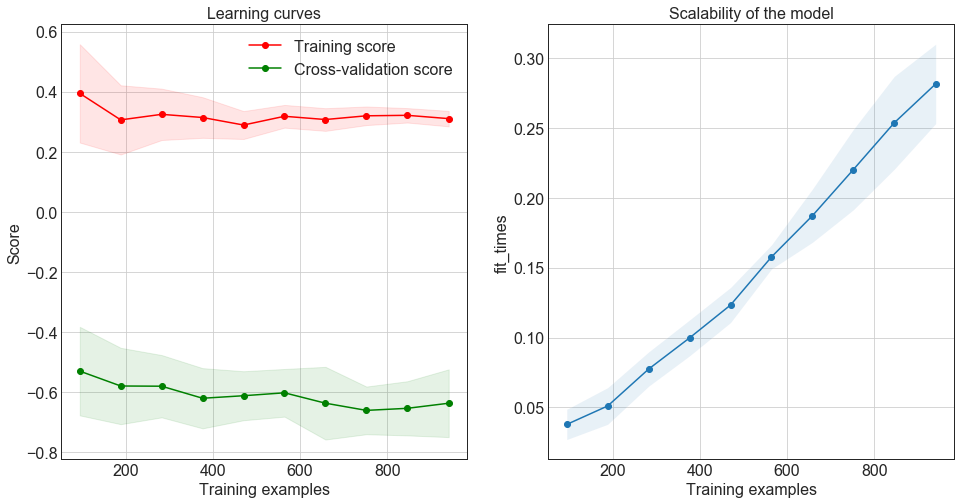

In [71]:
f, axes = plt.subplots(1, 2, figsize = (16, 8))

reg = AdaBoostRegressor(base_estimator = KNeighborsRegressor() , loss = 'linear',learning_rate= 1, n_estimators= 25)
titre = "Learning curves"
cv = ShuffleSplit(n_splits = 10, test_size = 0.2, random_state = 40)
train_sizes = np.linspace(.1, 1, 10)

axes[0].set_title(titre)
axes[0].set_xlabel("Training examples")
axes[0].set_ylabel("Score")

train_sizes, train_scores, test_scores, fit_times, _ = \
    learning_curve(reg, hos_X, hos_y, cv=cv, n_jobs=4,
    train_sizes=train_sizes, return_times=True)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
fit_times_mean = np.mean(fit_times, axis=1)
fit_times_std = np.std(fit_times, axis=1)

# Plot learning curve
axes[0].grid()
axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
axes[1].grid()
axes[1].plot(train_sizes, fit_times_mean, 'o-')
axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
axes[1].set_xlabel("Training examples")
axes[1].set_ylabel("fit_times")
axes[1].set_title("Scalability of the model")

plt.savefig("adareg.png")

Alexandre Castelnau